<a href="https://colab.research.google.com/github/roshan1960701/Genre_Prediction/blob/main/CA2_DM_genrePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

## Reading Raw Dataset from Gdrive

In [ ]:
rawDataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/n_movies.csv")

In [ ]:
rawDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9150 entries, 0 to 9149
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_ID      9150 non-null   int64  
 1   title         9150 non-null   object 
 2   year          9150 non-null   int64  
 3   certificate   9150 non-null   object 
 4   duration_min  9150 non-null   int64  
 5   genre         9150 non-null   object 
 6   Tag           9150 non-null   object 
 7   rating        9150 non-null   float64
 8   description   9150 non-null   object 
 9   stars         9150 non-null   object 
 10  votes         9150 non-null   object 
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

### Data cleaning

In [ ]:
rawDataset.isna().sum()

movie_ID           0
title              0
year               0
certificate        0
duration_min       0
genre              0
Tag                0
rating             0
description        0
stars              0
votes              0
Unnamed: 11     9150
Unnamed: 12     9150
Unnamed: 13     9150
Unnamed: 14     9150
Unnamed: 15     9150
Unnamed: 16     9150
Unnamed: 17     9150
Unnamed: 18     9150
Unnamed: 19     9150
Unnamed: 20     9150
Unnamed: 21     9150
Unnamed: 22     9150
Unnamed: 23     9150
Unnamed: 24     9150
Unnamed: 25     9150
Unnamed: 26     9150
Unnamed: 27     9150
Unnamed: 28     9150
Unnamed: 29     9150
Unnamed: 30     9150
Unnamed: 31     9150
Unnamed: 32     9150
Unnamed: 33     9150
Unnamed: 34     9150
Unnamed: 35     9150
Unnamed: 36     9150
dtype: int64

As we can see that unnamed columns are present in our dataset which are all having null values. So make a balance of all column we need to remove all unnamed columns from dataset

In [ ]:
# Dataset contains severals unnmaed column
# str.contains() is used to find perticular column in dataset and  loc used to access group of column
rawDataset = rawDataset.loc[:, ~rawDataset.columns.str.contains('^Unnamed')]
rawDataset = rawDataset.dropna()

In [ ]:
rawDataset.isna().sum()

movie_ID        0
title           0
year            0
certificate     0
duration_min    0
genre           0
Tag             0
rating          0
description     0
stars           0
votes           0
dtype: int64

In [ ]:
sum(rawDataset.duplicated())

0

## Exporting Cleaned Dataset into Gdrive

In [ ]:
rawDataset.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/NetflixCleanedDataset.csv',index=None)

## Data Exploration

In [ ]:
netflixDataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/NetflixCleanedDataset.csv")

In [ ]:
netflixDataset.head(5)

,movie_ID,title,year,certificate,duration_min,genre,Tag,rating,description,stars,votes
0,1,Cobra Kai,2018,TV-14,30,Action,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio','William Zabka','Courtney Hen...","177,031"
1,2,The Crown,2016,TV-MA,58,Biography,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy','Olivia Colman','Imelda Staunton...","199,885"
2,3,Better Call Saul,2022,TV-MA,46,Crime,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk','Rhea Seehorn','Jonathan Banks...","501,384"
3,4,Devil in Ohio,2022,TV-MA,356,Drama,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel','Sam Jaeger','Gerardo Celas...","9,773"
4,5,Cyberpunk: Edgerunners,2022,TV-MA,24,Animation,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar','Kenichiro Ohashi','Emi Lo','A...","15,413"


**VARIABLES ANALYSIS**

movie_ID - Numeric

title - Nominal

year - Integer

certificate - Polynomial

duration_min - Integer

genre - Polynomial

Tag - Nominal

rating - Real

description - Nominal

stars - Nominal

votes -  Numeric



## Data Preparation

In [ ]:
print('Total No of genre:',len(Counter(netflixDataset['genre'])))
print(Counter(netflixDataset['genre']))

Total No of genre: 26
Counter({'Comedy': 1998, 'Drama': 1583, 'Animation': 1297, 'Documentary': 1273, 'Action': 1113, 'Crime': 652, 'Adventure': 290, 'Biography': 177, 'Reality-TV': 173, 'Horror': 155, 'Short': 87, 'Family': 59, 'Thriller': 53, 'Game-Show': 53, 'Romance': 38, 'Music': 33, 'Mystery': 28, 'Fantasy': 26, 'Talk-Show': 25, 'Sci-Fi': 10, 'Western': 7, 'Sport': 6, 'News': 6, 'History': 4, 'Musical': 3, 'Film-Noir': 1})


In [ ]:
print('Total No of certificate:',len(Counter(netflixDataset['certificate'])))
print(Counter(netflixDataset['certificate']))

Total No of certificate: 20
Counter({'Unrated': 2806, 'TV-MA': 2485, 'TV-14': 1179, 'TV-PG': 540, 'R': 471, 'Not Rated': 467, 'TV-Y7': 338, 'PG-13': 282, 'TV-Y': 168, 'PG': 159, 'TV-G': 142, 'G': 42, 'TV-Y7-FV': 31, 'Approved': 26, 'Passed': 6, 'NC-17': 4, 'MA-17': 1, '12': 1, 'M': 1, 'E10+': 1})


In [ ]:
print('Total No of Tag:',len(Counter(netflixDataset['Tag'])))
print(Counter(netflixDataset['Tag']))

Total No of Tag: 561
Counter({'Comedy': 797, 'Animation, Action, Adventure': 527, 'Drama': 508, 'Documentary': 474, 'Comedy, Drama': 278, 'Crime, Drama, Mystery': 245, 'Drama, Romance': 234, 'Comedy, Drama, Romance': 203, 'Action, Crime, Drama': 169, 'Reality-TV': 164, 'Comedy, Romance': 162, 'Animation, Adventure, Comedy': 146, 'Action, Adventure, Drama': 134, 'Crime, Drama, Thriller': 129, 'Comedy, Crime, Drama': 111, 'Documentary, Crime': 108, 'Documentary, Comedy': 96, 'Drama, History': 95, 'Adventure, Comedy, Reality-TV': 92, 'Drama, Thriller': 85, 'Crime, Drama': 82, 'Action, Adventure, Comedy': 82, 'Documentary, Short': 78, 'Drama, Fantasy, Horror': 75, 'Drama, Horror, Mystery': 73, 'Action, Crime, Thriller': 73, 'Drama, Mystery, Thriller': 68, 'Animation, Comedy, Drama': 59, 'Action, Comedy, Drama': 56, 'Horror': 56, 'Animation, Short, Adventure': 55, 'Animation, Comedy, Family': 54, 'Thriller': 53, 'Action, Thriller': 47, 'Animation, Action, Comedy': 47, 'Crime, Drama, Fantasy

In [ ]:
# Converting rating float value to int
netflixDataset['rating'] = netflixDataset['rating'].astype(int)

In [ ]:
# Converting votes into numeric format and removing quotes('') and comma(,) from it
def convert_to_int(s):
    return int(s.replace(',', ''))

netflixDataset['votes'] = netflixDataset['votes'].apply(convert_to_int)


In [ ]:
# function to convert categorical data into numeric format .
def fillUp(data):
  l = {}
  n = 1
  for i in data:
    l[i] = n
    n = n+1
  return l

In [ ]:
genre = fillUp(pd.DataFrame(netflixDataset['genre'].value_counts()).index)
certificate = fillUp(pd.DataFrame(netflixDataset['certificate'].value_counts()).index)
tag = fillUp(pd.DataFrame(netflixDataset['Tag'].value_counts()).index)

In [ ]:
df1 = netflixDataset.replace({'genre':genre})
df2 = df1.replace({'Tag':tag})
df = df2.replace({'certificate':certificate})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9150 entries, 0 to 9149
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_ID      9150 non-null   int64 
 1   title         9150 non-null   object
 2   year          9150 non-null   int64 
 3   certificate   9150 non-null   int64 
 4   duration_min  9150 non-null   int64 
 5   genre         9150 non-null   int64 
 6   Tag           9150 non-null   int64 
 7   rating        9150 non-null   int64 
 8   description   9150 non-null   object
 9   stars         9150 non-null   object
 10  votes         9150 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 786.5+ KB


<ipython-input-26-63dcfebd7b1c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = df.corr()


<Axes: >

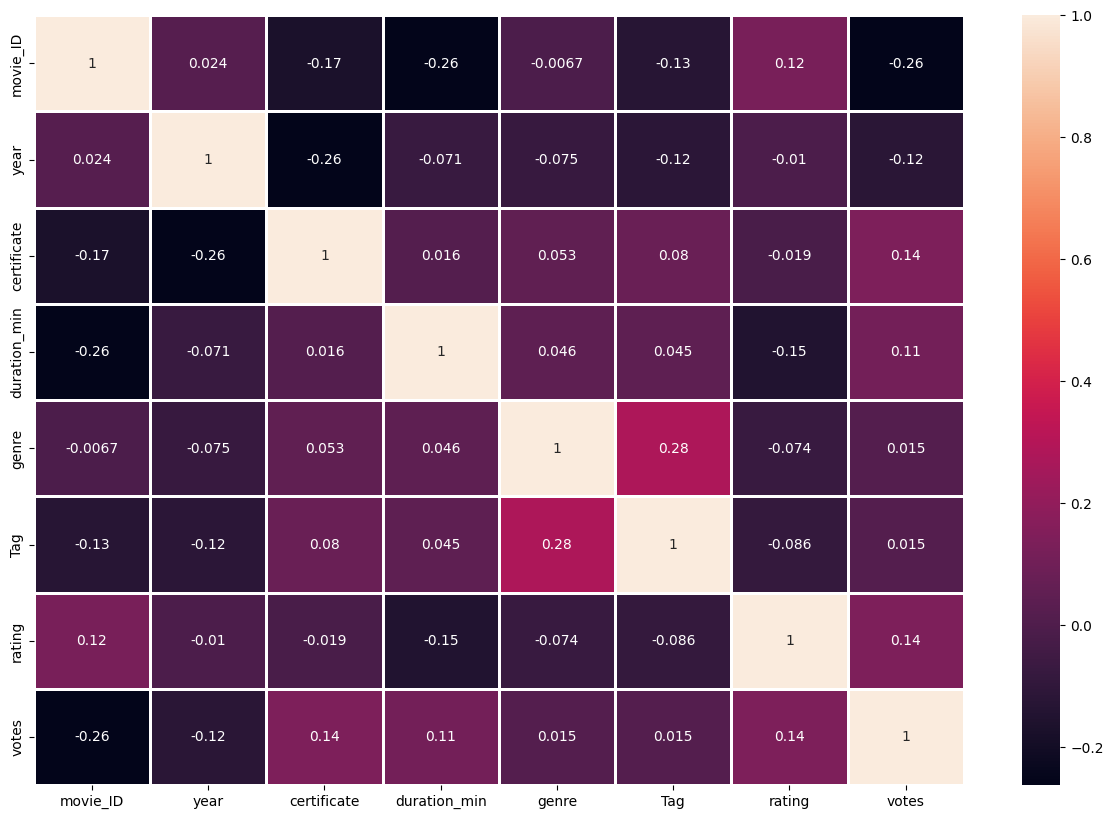

In [ ]:
plt.subplots(figsize=(15,10))
corrs = df.corr()
map1 = sns.heatmap(corrs, annot=True, linewidth=1)#, cmap='coolwarm')
map1

`Heatmap depicts that movie_ID variable is less correlated with votes.`

## Predicting genre of the movies

In [ ]:
X = df.drop(columns=['title','description','stars','genre','movie_ID'])
Y = df['genre']

### Random Forest Classification

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

# Create a Random Forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=101)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Calculate the accuracy score
accuracy = rfc.score(X_test, y_test)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))

Accuracy: 0.7604895104895105
              precision    recall  f1-score   support

           1       0.85      0.83      0.84       499
           2       0.78      0.81      0.79       410
           3       0.83      0.89      0.86       324
           4       0.75      0.83      0.79       324
           5       0.60      0.73      0.66       281
           6       0.78      0.64      0.71       163
           7       0.72      0.54      0.62        61
           8       0.43      0.27      0.33        48
           9       0.94      0.85      0.89        39
          10       0.62      0.39      0.48        38
          11       0.78      0.41      0.54        17
          12       0.67      0.40      0.50        15
          13       0.38      0.25      0.30        12
          14       0.75      0.25      0.38        12
          15       0.50      0.21      0.30        14
          16       0.50      0.60      0.55         5
          17       0.00      0.00      0.00         

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

# Create a Random Forest classifier
rfc = RandomForestClassifier(random_state=101)

# Set the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Calculate the accuracy score
accuracy = grid_search.score(X_test, y_test)
print("Accuracy:", accuracy)

# Print the best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.7596153846153846
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


### Gradient Boosting Classifier

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

# Create a Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=101)

# Fit the model to the training data
gbc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbc.predict(X_test)

# Calculate the accuracy score
accuracy = gbc.score(X_test, y_test)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))

Accuracy: 0.9187062937062938
              precision    recall  f1-score   support

           1       0.97      0.93      0.95       499
           2       0.95      0.91      0.93       410
           3       0.95      0.92      0.93       324
           4       0.85      0.94      0.89       324
           5       0.83      0.93      0.88       281
           6       0.98      0.94      0.96       163
           7       0.89      0.82      0.85        61
           8       0.95      0.83      0.89        48
           9       1.00      1.00      1.00        39
          10       0.94      0.84      0.89        38
          11       0.69      0.53      0.60        17
          12       0.86      0.80      0.83        15
          13       1.00      0.92      0.96        12
          14       1.00      1.00      1.00        12
          15       0.81      0.93      0.87        14
          16       1.00      1.00      1.00         5
          17       0.75      1.00      0.86         

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Visualisation of genre

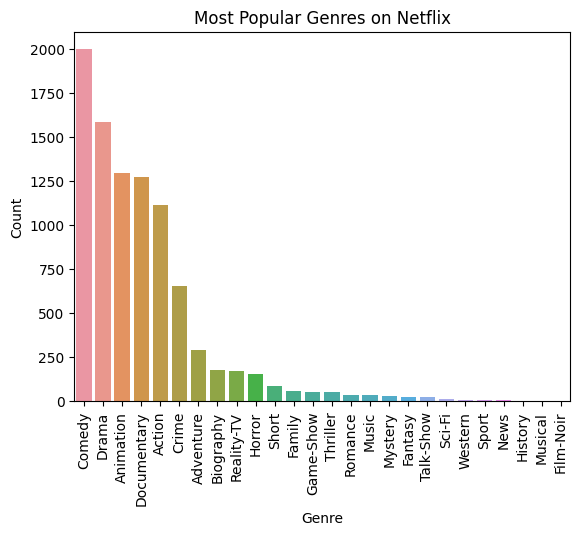

In [ ]:
# Which genres are the most popular among Netflix viewers?
dfSet = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/NetflixCleanedDataset.csv")

genre_counts = dfSet['genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts)
plt.xticks(rotation=90)
plt.title("Most Popular Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

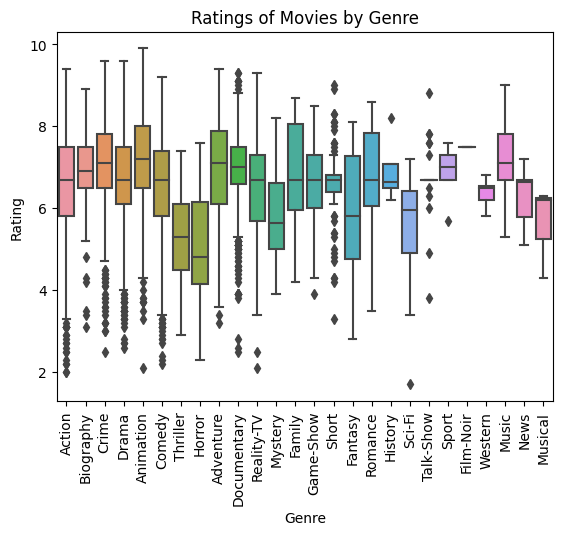

In [ ]:
# Which genres tend to have higher ratings than others on Netflix?
sns.boxplot(x="genre", y="rating", data=dfSet)
plt.xticks(rotation=90)
plt.title("Ratings of Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.show()

## Refenreces


- https://sites.temple.edu/tudsc/2017/03/30/measuring-similarity-between-texts-in-python/#:~:text=The%20cosine%20similarity%20is%20the,the%20similarity%20between%20two%20documents.

- https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/